# **An Introduction to Working with Molecules in RDKit**

## **Table of Contents**
1. [Installation and imports](#1)
2. [The RDKit Molecule Class](#2)
3. [Drawing and Displaying Molecules](#3)
5. [Substructural Searching](#4)
6. [Computing Chemical Descriptors](#5)
7. [Molecular Fingerprints (ECFP/Morgan Fingerprints + Count Fingerprints)](#6)
7. [Computing Similarities by Tanimoto Similarities](#7)


<a name="1"></a>
#### **Installation and imports**

In [ ]:
!pip install rdkit chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.32.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem

In [ ]:
data = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv")

<a name="2"></a>
## **The RDKit Molecule Class**

In RDKit, the Molecule class is the basis for representing a molecule. This representation holds the atoms, bonds and other information, and all the calculations of descriptors, similarity and substructure searches and various other operations we will be doing, are going to be performed on objects of the Molecule class. RDKit has methods for generating a Molecule object from various representations, such as InChi-keys, SMILES, SMARTS, MolFiles and even FASTA-files. And many more on top of that. In this post we will be using SMILES-strings. Below I've fetched the SMILES for the small molecule antidiabetic drug, metformin and converted it into a Molecule-object.



In [ ]:
metformin_smiles = "CN(C)C(=N)N=C(N)N"
metformin_mol = Chem.MolFromSmiles(metformin_smiles)

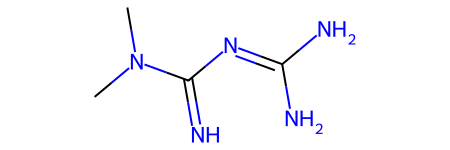

In [ ]:
metformin_mol

Two methods allow us to fetch the atoms and bonds in our molecule. The GetAtoms() and GetBonds() methods return iterables of individual atoms and bonds respectively.

In [ ]:
atoms = metformin_mol.GetAtoms()
bonds = metformin_mol.GetBonds()

#### **Atom Properties**

Atoms and bonds have a lot of build in methods for fetching useful information about them. Let's first try to iterate over the atoms. In any molecule, each atom has an unique index which allows us to unambiguously identify atoms within the molecule. Below we also fetch the atomic number, hybridization, mass, symbol and degree of each atom. The degree is the number of other atoms that the atom in question is bound to.

In [ ]:
for atom in atoms:
  idx = atom.GetIdx()
  atomic_num = atom.GetAtomicNum()
  hybridization = atom.GetHybridization()
  mass = atom.GetMass()
  symbol = atom.GetSymbol()
  degree = atom.GetDegree()
  print(f"Atom at index {idx} is {symbol}. Atomic number: {atomic_num} - Atomic mass: {mass} Da. This atom is {hybridization}-hybridized")

Atom at index 0 is C. Atomic number: 6 - Atomic mass: 12.011 Da. This atom is SP3-hybridized
Atom at index 1 is N. Atomic number: 7 - Atomic mass: 14.007 Da. This atom is SP2-hybridized
Atom at index 2 is C. Atomic number: 6 - Atomic mass: 12.011 Da. This atom is SP3-hybridized
Atom at index 3 is C. Atomic number: 6 - Atomic mass: 12.011 Da. This atom is SP2-hybridized
Atom at index 4 is N. Atomic number: 7 - Atomic mass: 14.007 Da. This atom is SP2-hybridized
Atom at index 5 is N. Atomic number: 7 - Atomic mass: 14.007 Da. This atom is SP2-hybridized
Atom at index 6 is C. Atomic number: 6 - Atomic mass: 12.011 Da. This atom is SP2-hybridized
Atom at index 7 is N. Atomic number: 7 - Atomic mass: 14.007 Da. This atom is SP2-hybridized
Atom at index 8 is N. Atomic number: 7 - Atomic mass: 14.007 Da. This atom is SP2-hybridized


You might already here wonder how we can figure out which atom in our molecule that a specific index corresponds to. In the section 'Drawing and displaying molecules' i will show a straightforward way to display a molecule annotated with the atom indices.

You might also wondered why there are no hydrogen atoms. In RDKit implicit hydrogens are not included by default, but can be converted to explicit hydrogens using the Chem.AddHs() function.

#### **Bond Properties**

Just like we iterated over the atoms, we can iterate over the bonds and get important information. Below i will fetch the begin and end atom of each bond, as well as the atom object itself. I'll also fetch the bond-type (single, double, triple...) and boolean flags for whether the bond is conjugated and whether the bond is aromatic.

In [ ]:
for bond in bonds:
  start_atom = bond.GetBeginAtom().GetSymbol()
  end_atom = bond.GetEndAtom().GetSymbol()
  start_idx = bond.GetBeginAtomIdx()
  end_idx = bond.GetEndAtomIdx()

  bondtype = bond.GetBondType()
  is_conj = bond.GetIsConjugated()
  is_arom = bond.GetIsAromatic()

  print(f"This bond is a {bondtype} bond that connects {start_atom} at index {start_idx} with {end_atom} at {end_idx}. Conjugated: {is_conj}. Aromatic: {is_arom}")


This bond is a SINGLE bond that connects C at index 0 with N at 1. Conjugated: False. Aromatic: False
This bond is a SINGLE bond that connects N at index 1 with C at 2. Conjugated: False. Aromatic: False
This bond is a SINGLE bond that connects N at index 1 with C at 3. Conjugated: True. Aromatic: False
This bond is a DOUBLE bond that connects C at index 3 with N at 4. Conjugated: True. Aromatic: False
This bond is a SINGLE bond that connects C at index 3 with N at 5. Conjugated: True. Aromatic: False
This bond is a DOUBLE bond that connects N at index 5 with C at 6. Conjugated: True. Aromatic: False
This bond is a SINGLE bond that connects C at index 6 with N at 7. Conjugated: True. Aromatic: False
This bond is a SINGLE bond that connects C at index 6 with N at 8. Conjugated: True. Aromatic: False


<a name="3"></a>
## **Drawing and Displaying Molecules**

In a jupyter notebook, calling any molecule will automatically render it's structure.

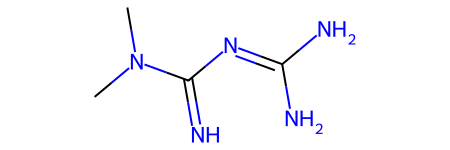

In [ ]:
metformin_mol

Using Chem.Draw.MolToImage returns a PIL image of the structure.

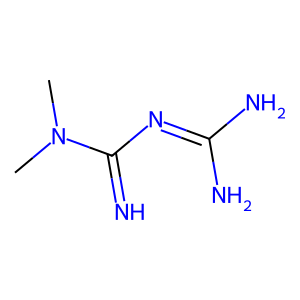

In [ ]:
Chem.Draw.MolToImage(metformin_mol, size = (300, 300))

#### **Drawing Options - Customizing how structures are drawn**

Drawing options allow you to customize the drawing of the molecular structure in a lot of different ways. For example we can add explicit methyl groups, or choose a non-default colorpallete. We can also add the indices of each atom in the molecule.

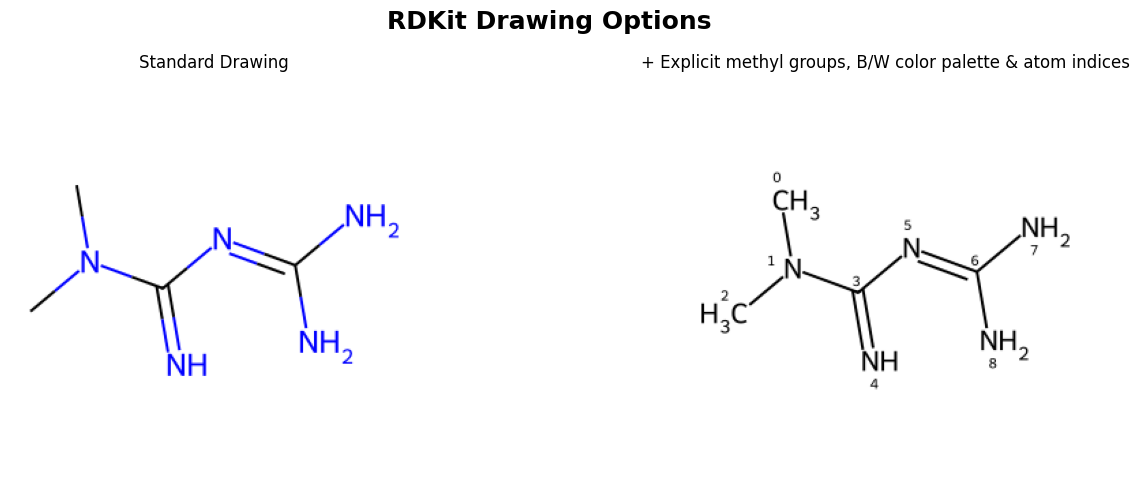

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

drawopts = Chem.Draw.MolDrawOptions()
drawopts.explicitMethyl = True
drawopts.useBWAtomPalette()
drawopts.addAtomIndices = True

ax[0].set_title("Standard Drawing")
ax[0].imshow(Chem.Draw.MolToImage(metformin_mol))
ax[1].set_title("+ Explicit methyl groups, B/W color palette & atom indices")
ax[1].imshow(Chem.Draw.MolToImage(metformin_mol, options = drawopts))

# Remove ticks, spines from plots
ax[0].axis("off")
ax[1].axis("off")

fig.suptitle("RDKit Drawing Options", fontsize = 18, fontweight = "bold")
fig.tight_layout()

#### **Using Abbreviations in Drawings**

It's also possible to draw molecules using common abbreviations for functional groups. For this we need to import rdAbbreviations from rdkit.Chem. We create a new mol by condensing certain groups into their abbreviations, using **rdAbbreviations.CondenseMolAbbreviations**. This method takes a molecule, a map of the abbreviations to be applied, and the argument *maxCoverage* (float) that defines what % of the molecule that is maximally covered by abbreviations.

In [ ]:
from rdkit.Chem import rdAbbreviations

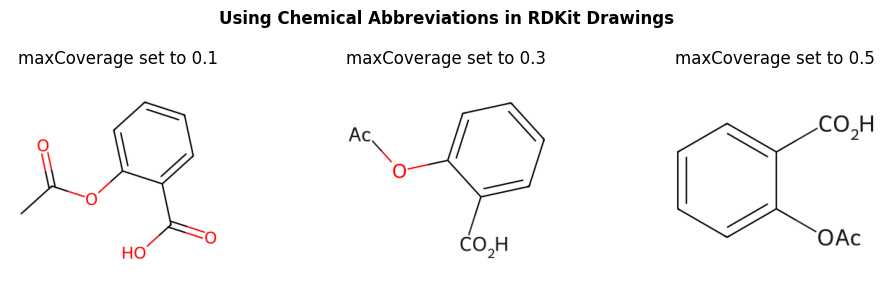

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (10,3))

coverages = (0.1, .3, .5)
axes = (0, 1, 2)
aspirin = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")

for _ax, coverage in zip(axes, coverages):
  abbrevs = rdAbbreviations.GetDefaultAbbreviations()
  nm = rdAbbreviations.CondenseMolAbbreviations(aspirin, abbrevs, maxCoverage = coverage)
  ax[_ax].imshow(Chem.Draw.MolToImage(nm))
  ax[_ax].axis("off")
  ax[_ax].set_title(f"maxCoverage set to {coverage}")

fig.suptitle("Using Chemical Abbreviations in RDKit Drawings", fontweight = "bold")
fig.tight_layout()

#### **Drawing Multiple Molecules**
Assume that we have many molecules that we want to draw into the same figure. RDKit has a built in function, **MolsToGridImage** for drawing many molecules to a grid. It also has possibility of adding a legend to the individual molecules. The function takes a list of molecules.


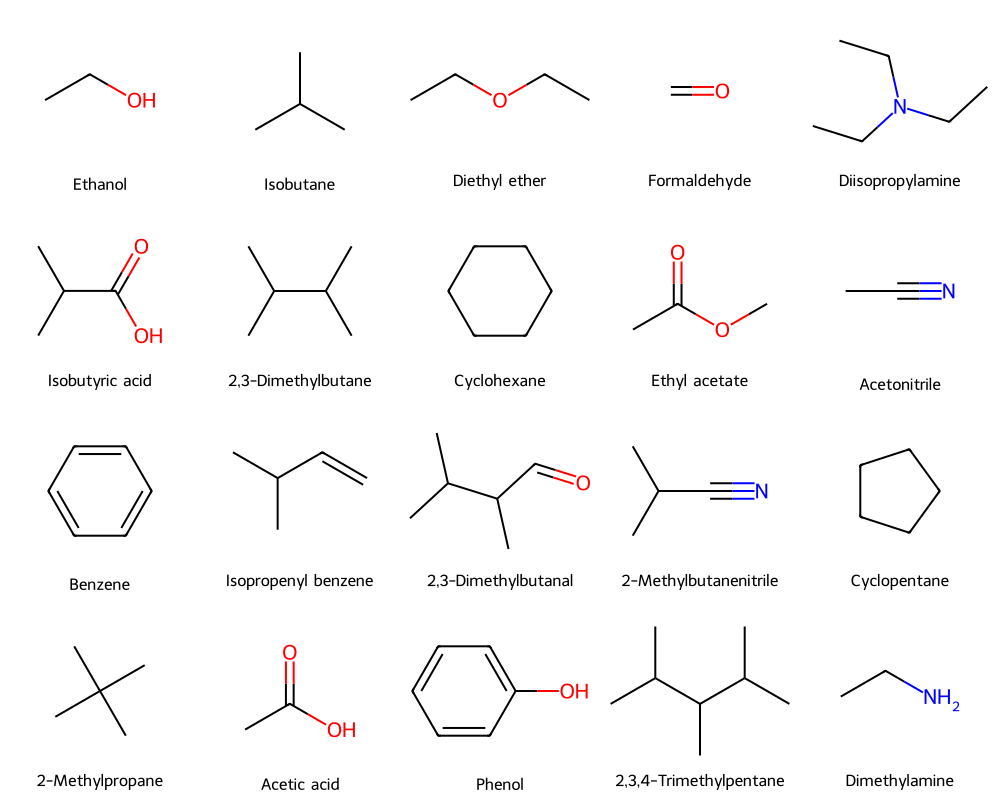

In [ ]:
smiles_with_names = [
    ('CCO', 'Ethanol'),
    ('CC(C)C', 'Isobutane'),
    ('CCOCC', 'Diethyl ether'),
    ('C=O', 'Formaldehyde'),
    ('CCN(CC)CC', 'Diisopropylamine'),
    ('CC(C)C(=O)O', 'Isobutyric acid'),
    ('CC(C)C(C)C', '2,3-Dimethylbutane'),
    ('C1CCCCC1', 'Cyclohexane'),
    ('CC(=O)OC', 'Ethyl acetate'),
    ('CC#N', 'Acetonitrile'),
    ('C1=CC=CC=C1', 'Benzene'),
    ('CC(C)C=C', 'Isopropenyl benzene'),
    ('CC(C)C(C)C=O', '2,3-Dimethylbutanal'),
    ('CC(C)C#N', '2-Methylbutanenitrile'),
    ('C1CCCC1', 'Cyclopentane'),
    ('CC(C)(C)C', '2-Methylpropane'),
    ('CC(=O)O', 'Acetic acid'),
    ('C1=CC=CC=C1O', 'Phenol'),
    ('CC(C)C(C)C(C)C', '2,3,4-Trimethylpentane'),
    ('CCN', 'Dimethylamine')
]

mols_list = [Chem.MolFromSmiles(tup[0]) for tup in smiles_with_names]
labels = [tup[1] for tup in smiles_with_names]

Chem.Draw.MolsToGridImage(mols_list, molsPerRow = 5, legends = labels)

#### **Drawing RDKit molecules in Matplotlib Plots**
Maybe you want to add the chemical structure of a molecule to an existing matplotlib plot with subplots. Or maybe you are interested in adding your own custom annotation, titles etc. to a grid of molecules. The PIL object returned by Chem.Draw.MolToImage() can be plotted in matplotlib subplots, to yield customizable grids of molecules that look similar to the one created by Draw.MolsToGridImage.

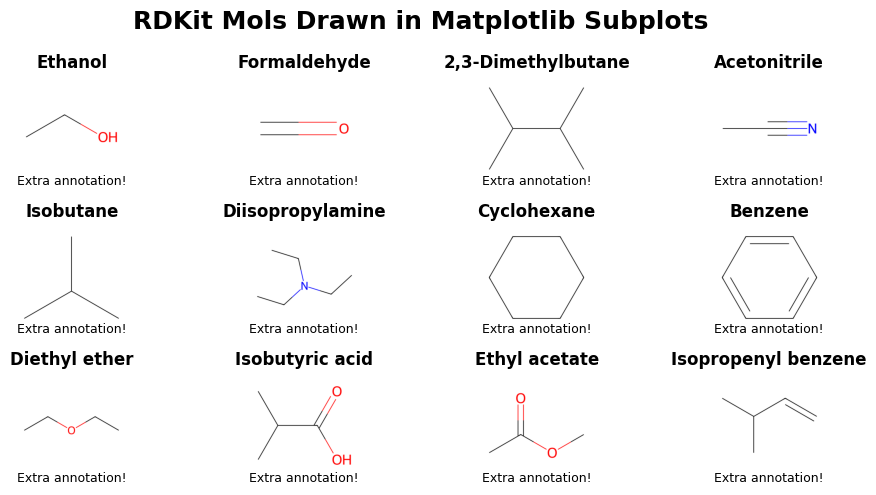

In [ ]:
fig, ax = plt.subplots(3,4, figsize = (10,5))
n_mols = 3 * 4

mols = mols_list[:n_mols]

i = 0

for row in range(4):
  for col in range(3):
    ax[col][row].imshow(Chem.Draw.MolToImage(mols[i]))
    ax[col][row].axis("off")
    ax[col][row].set_title(labels[i], fontweight = "bold", fontsize = 12)

    horizontal_center = ax[col][row].get_xlim()[1]/2  # Get the horizontal center coordinates by dividng the upper xlim by 2
    vertical_min = ax[col][row].get_ylim()[0]         # Get the min on the y-axis by taking the lower bound of the ylim

    ax[col][row].text(horizontal_center, vertical_min, "Extra annotation!", ha = "center", va = "center", fontsize = 9)
    i += 1

plt.suptitle("RDKit Mols Drawn in Matplotlib Subplots", fontweight = "bold", fontsize = 18)
fig.tight_layout()

Another case in which it might be useful to plot molcules into a matplotlib plot, is if we have a bar-char, line-chart etc. showing some properties of molecules and want to add some chemical context.

In [ ]:
from rdkit.Chem import Descriptors
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [ ]:
mol_sample = mols_list[:10]
logp = [Descriptors.MolLogP(mol) for mol in mol_sample]

Text(0, 0.5, 'logP')

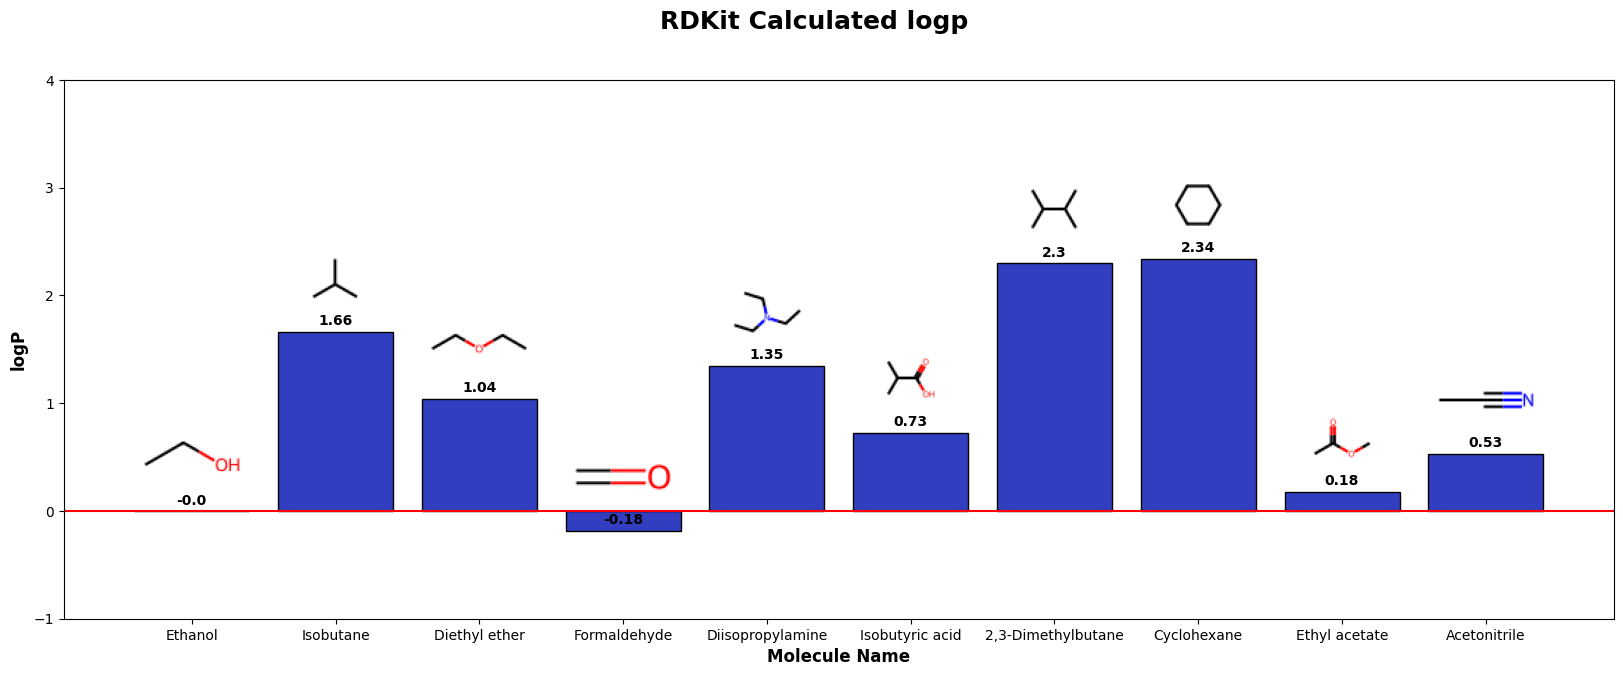

In [ ]:
fig, ax = plt.subplots(figsize = (20,7))

ax.set_ylim(-1, 4)

x = [i for i in range(10)]
y = logp

for x, y, mol in zip(x, y, mol_sample):
  ax.bar(x,y, color = "#303ebf", edgecolor = "black")
  imagebox = OffsetImage(Chem.Draw.MolToImage(mol, size = (75,30)))
  ab = AnnotationBbox(imagebox, (x, y+.5), frameon = False)
  ax.add_artist(ab)

  ax.text(x, y+.1, round(y,2), ha = "center", va = "center", fontweight = "bold")

ax.axhline(0, c = "red")

fig.suptitle("RDKit Calculated logp", fontsize = 18, fontweight = "bold")

ax.set_xticks(range(10))
ax.set_xticklabels(labels[:10])
ax.set_xlabel("Molecule Name", fontsize = 12, fontweight = "bold")
ax.set_ylabel("logP", fontsize = 12, fontweight = "bold")


<a name="4"></a>
## **Substructural Searching**

The easiest way to search for specific substructures is to use a query molecule, that is matched against all other molecules in a set for possible matches. The query molecule is like any other molecule generated from SMILES, SMARTS, etc. We can try to scan all the molecules we drew earlier for the presence of a benzoic acid group.

#### **Searching with a query molecule**

In [ ]:
toxdata = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/clintox.csv.gz")

In [ ]:
mols = [Chem.MolFromSmiles(smile) for smile in toxdata.smiles.values]
mols_cleaned = [mol for mol in mols if mol is not None]

[16:12:19] Explicit valence for atom # 0 N, 5, is greater than permitted
[16:12:19] Can't kekulize mol.  Unkekulized atoms: 9
[16:12:20] Can't kekulize mol.  Unkekulized atoms: 4
[16:12:20] Can't kekulize mol.  Unkekulized atoms: 4


In [ ]:
pattern = Chem.MolFromSmiles("C1=CC=C(C=C1)C(=O)O") # Querying for a benzoic acid group

matches = []

for mol in mols_cleaned:
  if mol.HasSubstructMatch(pattern):
    matches.append((mol, mol.GetSubstructMatches(pattern)))

#### **Highlighting Matching Substructures In A Single Molecule**

If a molecule has one or more substructure matches, the matching atoms will automatically be highlighted, when the molecule is called.

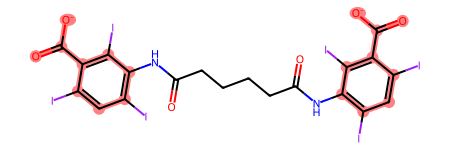

In [ ]:
matches[0][0]

If however we use MolToImage, we will have to pass the atom and bond indices to highlight. We saved the atom indices in our matches list. Geting the bond indices requires a bit more code. Notice below that the matches returned by GetSubstructMatches are tuple of atom indices (tuples of tuples if more than 1 match). But highlightAatoms in MolToImage takes a single list or tuple, hence we need to unpack the nested tuple.

In [ ]:
matches[0][1]

((5, 4, 3, 2, 1, 0, 30, 31, 32), (18, 17, 22, 21, 20, 19, 24, 25, 26))

In [ ]:
import itertools

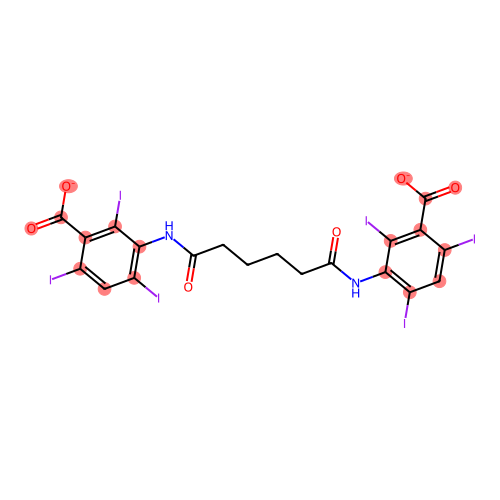

In [ ]:
matches_unpacked = [list(itertools.chain(*i[1])) for i in matches]
Chem.Draw.MolToImage(matches[0][0], highlightAtoms = matches_unpacked[0], size = (500,500))

As you can see this only highlights the atoms. To highlight bonds we need to supply the indices of the bonds to the argument highlightBonds. We can easily get the bond indices of the match and highlight those as well,

In [ ]:
def bonds_from_match(query, mol, match_tuple):
  bonds = []

  for bond in query.GetBonds():                                                                 # Iterate over all bonds in the query molecule
    start_idx = bond.GetBeginAtomIdx()                                                          # save the begin and end atom indices of the bond
    end_idx = bond.GetEndAtomIdx()

    for match_idx in match_tuple:                                                               # For each element in the match-tuple returned by GetSubstructMatches (there can be one for each match)
      bonds.append(mol.GetBondBetweenAtoms(match_idx[start_idx], match_idx[end_idx]).GetIdx())  # Save the index of the bond between the start and end atom, we saved from the query molecule

  return bonds

In [ ]:
bonds_to_highlight = bonds_from_match(pattern, matches[0][0], matches[0][1])

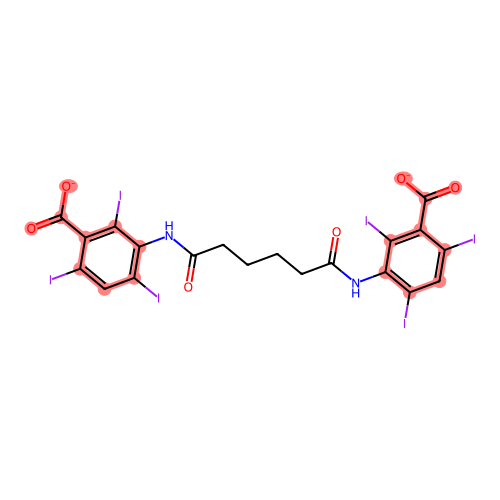

In [ ]:
Chem.Draw.MolToImage(matches[0][0], highlightAtoms = matches_unpacked[0], size = (500,500), highlightBonds = bonds_to_highlight)

Now we see that highlighiting atoms and bonds in a molecule, just requires knowledge of the bond and atom indices.

#### **Highlighting Substructures In Grid of Molecules**
If you are drawing a grid of molecules using Draw.MolsToGridImage or Draw.MolsMatrixToGridImage, it is still possible to highlight atoms and bonds, by supplying either a list of lists of atoms/bonds to be highlighted in the case of Draw.MolsToGridImage, and a matrix of atoms/bonds to be highlighted in the case of MolsMatrixToGridImage.



#### **Finding the Maximal Common Substructure of Two or More Molecules**

Let's consider the biosynthesis of catecholamines, which are all derivatives of L-tyrosine, and thus are structurally very similar. Looking at the below pathway for the biosynthesis, it's not hard to determine what the maximal common substructure is, but if you have many molecules with more complex structures, it can be quite challenging. To find a maximal common substructure, we use the rdFMCS class from rdkit.Chem.

<img src='https://lh6.googleusercontent.com/6kV93sImhNUY-s_LMAVdRtnWQB5xJwf7i5PVRiK9P1q31RPrGIrORxjiLfqd3VQbdnOeKGZCCpESC7iwd4IRyuVJtNwe7D5VxggC399_Koaa_5GhG1BsA255OM4OfDpWj4FZr0BH=w637-h416'>



In [ ]:
from rdkit.Chem import rdFMCS

In [ ]:
tyr = Chem.MolFromSmiles("C1=CC(=CC=C1CC(C(=O)O)N)O")
dopa = Chem.MolFromSmiles("C1=CC(=C(C=C1CC(C(=O)O)N)O)O")
dopamine = Chem.MolFromSmiles("C1=CC(=C(C=C1CCN)O)O")
noradr = Chem.MolFromSmiles("C1=CC(=C(C=C1C(CN)O)O)O")
adr = Chem.MolFromSmiles("CNCC(C1=CC(=C(C=C1)O)O)O")

We call FindMCS from rdFMCS to get the maximal common substructure.

In [ ]:
query_molecules = [tyr, dopa, dopamine, noradr, adr]  # We pass a list of molecules to rdFMCS.FindMCS
mcs = rdFMCS.FindMCS(query_molecules)

We can then retrieve a SMARTS string describing the MCS, through the smartsString attribute on the object returned by FindMCS.

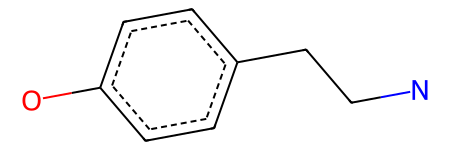

In [ ]:
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)                  # The result of the MCS query has a smartsString attribute, we can use to draw the MCS
mcs_mol

Below I'll use the same method of highlighting that we went through earlier, to highlight the MCS in all of the molecules in the adrenaline biosynthesis pathway.

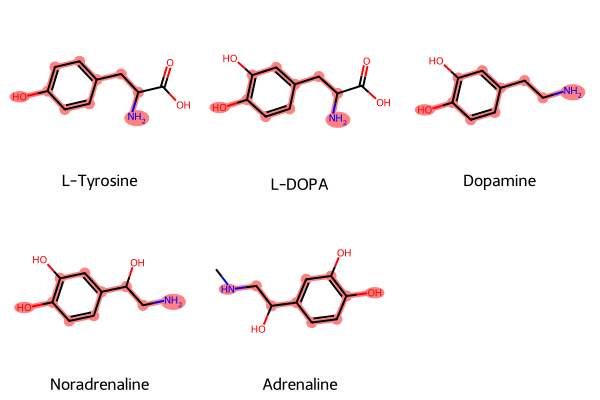

In [ ]:
labels = ["L-Tyrosine","L-DOPA", "Dopamine", "Noradrenaline", "Adrenaline"]
mcs_matches = [mol.GetSubstructMatches(mcs_mol) for mol in query_molecules] # Get the matching atoms for the MCS in each of the molecules
mcs_matches_unpacked =[list(itertools.chain(*i)) for i in mcs_matches]      # Unpack the tuples into a list of lists


Chem.Draw.MolsToGridImage(query_molecules, highlightAtomLists = mcs_matches_unpacked, legends = labels) # Draw the molecules to a grid with the MCS highlighted

#### **Highlighting Differences between two Molecules**
Working with large molecules that are very similar, it can be hard to spot differences at the first glance. Luckily it's pretty easy to determine differences between two molecules, and highlighting these when drawing.

In [ ]:
imatinib = Chem.MolFromSmiles("Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C")
dasatinib = Chem.MolFromSmiles("Cc1cccc(c1NC(=O)c2cnc(s2)Nc3cc(nc(n3)C)N4CCN(CC4)CCO)Cl")

Text(0.5, 1.0, 'Dasatinib')

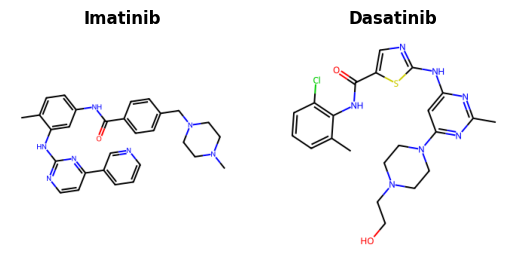

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Chem.Draw.MolToImage(imatinib))
ax[1].imshow(Chem.Draw.MolToImage(dasatinib))

ax[0].axis("off")
ax[0].set_title("Imatinib", fontweight = "bold")
ax[1].axis("off")
ax[1].set_title("Dasatinib", fontweight = "bold")

In [ ]:
mcs = rdFMCS.FindMCS([imatinib, dasatinib])

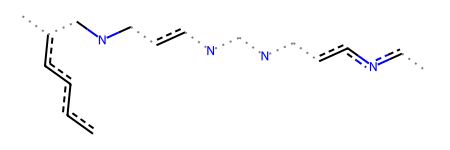

In [ ]:
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
mcs_mol

In [ ]:
def get_differing_atoms(mols: list):
  mcs = rdFMCS.FindMCS(mols)
  mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

  ret = []

  for mol in mols:
    idx = [atom.GetIdx() for atom in mol.GetAtoms()]
    substruct_match = mol.GetSubstructMatches(mcs_mol)
    differing_atoms = [id for id in idx if id not in list(itertools.chain(*substruct_match))]
    ret.append(differing_atoms)

  return ret

In [ ]:
diff_atoms = get_differing_atoms([imatinib, dasatinib])

#### **Extracting Scaffolds and Filtering Molecules By Their Scaffolds**

For this part we'll need some new molecules. I'll use the chembl-webresource client library to fetch a group of molecules with activity against the nuclear receptor PPAR-alpha.

In [ ]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from chembl_webresource_client.new_client import new_client

In [ ]:
target = new_client.target
ppar_alpha_id = "CHEMBL239"
activity = new_client.activity
ppar_activities = activity.filter(target_chembl_id=ppar_alpha_id).filter(standard_type="IC50")

In [ ]:
activities_df = pd.DataFrame(ppar_activities)
molecule_ids = activities_df.molecule_chembl_id.to_list()

molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=molecule_ids).only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])

In [ ]:
ppar_df = pd.DataFrame(mols)
ppar_df["smiles"] = ppar_df.molecule_structures.apply(lambda x: x["canonical_smiles"])
ppar_df["mol"] = ppar_df.smiles.apply(lambda x: Chem.MolFromSmiles(x))
ppar_df["scaffold"] = ppar_df.smiles.apply(lambda x: MurckoScaffold.MurckoScaffoldSmilesFromSmiles(x))

In [ ]:
top_10_scaffolds = ppar_df[ppar_df.scaffold != ""].scaffold.value_counts().index[:10]
top_10_scaffolds

Index(['O=S(=O)(Nc1cccc(-c2ccccc2)c1)c1ccccc1',
       'c1ccc(-c2nc(Cn3ccc4ccccc43)co2)cc1', 'c1ccc(OCCCOc2ccc3c(c2)OCCC3)cc1',
       'O=C(NCc1cccc(Oc2ccccc2)c1)c1ccccc1',
       'c1ccc(Oc2cn(-c3ccccc3)c3ccccc23)cc1',
       'c1ccc(Oc2ccc(OCCCOc3ccc4c(c3)OCCC4)cc2)cc1',
       'O=C(Nc1ccccc1)c1cccc(S(=O)(=O)n2ccc3ccccc32)c1',
       'c1ccc(-c2nc(CCOc3cccc4sccc34)co2)cc1',
       'O=C(Nc1ccccc1)c1cccc(S(=O)(=O)N2CCc3ccccc3C2)c1',
       'O=C1NC(=O)C(c2ccc(OCCCOc3ccc(Oc4ccccc4)cc3)cc2)S1'],
      dtype='object')

Let's draw the top 10 scaffolds out using MolsToGridImage.

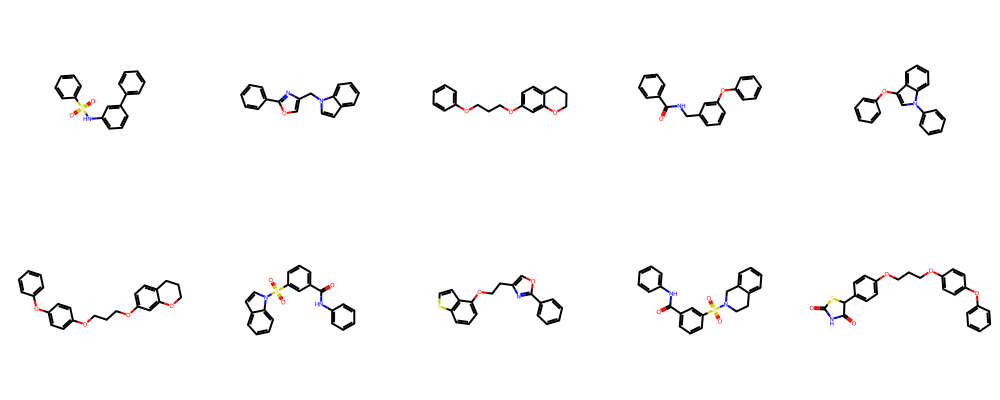

In [ ]:
top_10_scaffold_mols = [Chem.MolFromSmiles(i) for i in top_10_scaffolds]

Chem.Draw.MolsToGridImage(top_10_scaffold_mols, molsPerRow = 5)

We can then take the first (most common) scaffold and filter the dataframe for molecules that use this scaffold, and draw them.

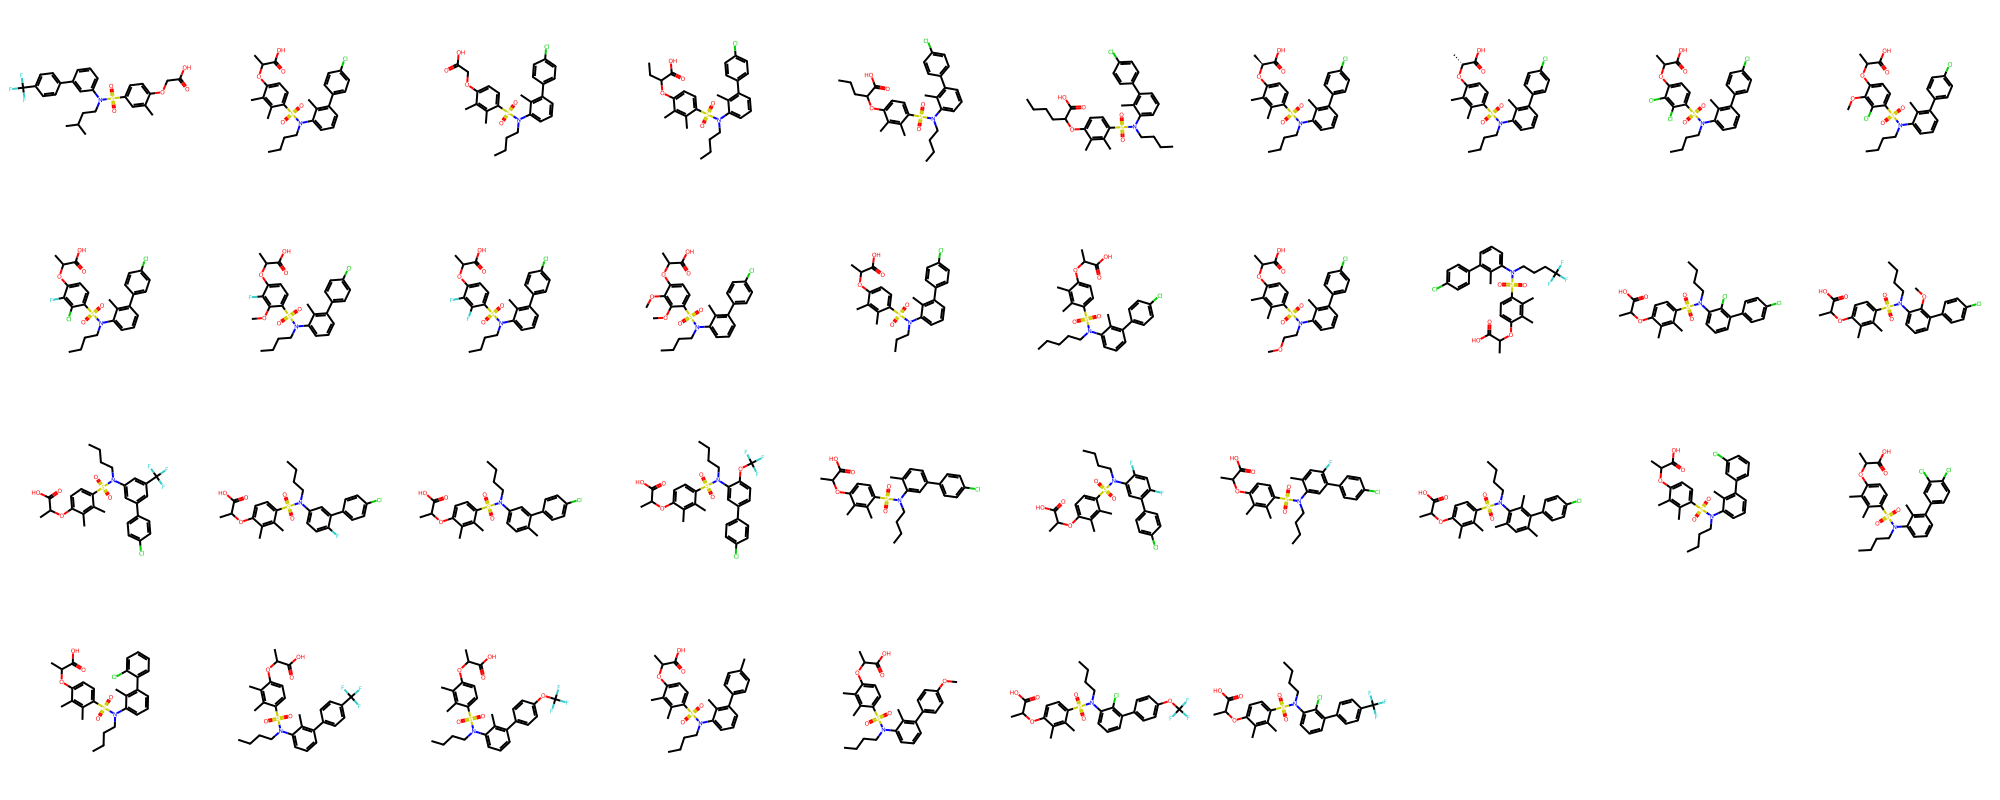

In [ ]:
most_common_scaffold_smiles = ppar_df[ppar_df.scaffold == top_10_scaffolds[0]].smiles.values
most_common_scaffold_mols = [Chem.MolFromSmiles(i) for i in most_common_scaffold_smiles]

Chem.Draw.MolsToGridImage(most_common_scaffold_mols, molsPerRow = 10)

<a name="5"></a>
## **Computing Molecular Descriptors**

<a name="6"></a>
## **Molecular Fingerprints**
In this part we will look into molecular fingerprints, specifically extended connectivity fingerprints, also known in RDKit as Morgan fingerprints. The fingerprints are vectors of a certain size, with each element being a bit that is either on or off. These fingerprints are generated by identifying fragments in a radius of a certain number of bonds from each atom. Each fragment corresponds to a certain bit in the fingerprint, and if the fragment is present, the bit at that index is set on (set to 1 instead of 0).

The fingerprints are useful in many cases. They lay the foundation for calculating molecular similarities, like the Tanimoto similarity, which is a measure of the ratio between how many bits two molecules have in common to the total number of bits.

The fingerprints are also extensively used in machine learning models, as the fingerprints serve as an easy way to encode chemical features numerically, and thus can serve as the basis for which a model can learn how molecular features, correlate with an output variable.

#### **Morgan Fingerprints**

In [ ]:
fpgen = AllChem.GetMorganGenerator(radius=2, fpSize = 1024)

In [ ]:
mols = [tyr, dopa, dopamine, noradr, adr]
labels = ["Tyrosine", "L-DOPA", "Dopamine", "Noradrenaline", "Adrenaline"]
fps = [fpgen.GetFingerprint(i) for i in mols]

By default, the fingerprint generator returns an RDKit datastructure, that is useful if you are applying othe RDKit operations to your fingerprint.

In [ ]:
type(fps[0]), fps[0]

(rdkit.DataStructs.cDataStructs.ExplicitBitVect,
 <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x7e55a7f7a1f0>)

In most cases you would likely want to work with your fingerprint as a numpy array. This is as easy as calling np.array() on it.

In [ ]:
fp0_as_np = np.array(fps[0])
fp0_as_np, fp0_as_np.shape

(array([0, 1, 0, ..., 0, 0, 0]), (1024,))

Now we can see that it really is just a vector of size 1024 with ones and zeros. A more visual representation of a fingerprint, can be made by displaying the fingerprints in a plot. Below i will reshape the fingerprints from the size 1024 vector to a 32x32 matrix, and plot it in a matplotlib plot.

<ipython-input-52-fa9a45223af9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(range(32))
<ipython-input-52-fa9a45223af9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(range(32))


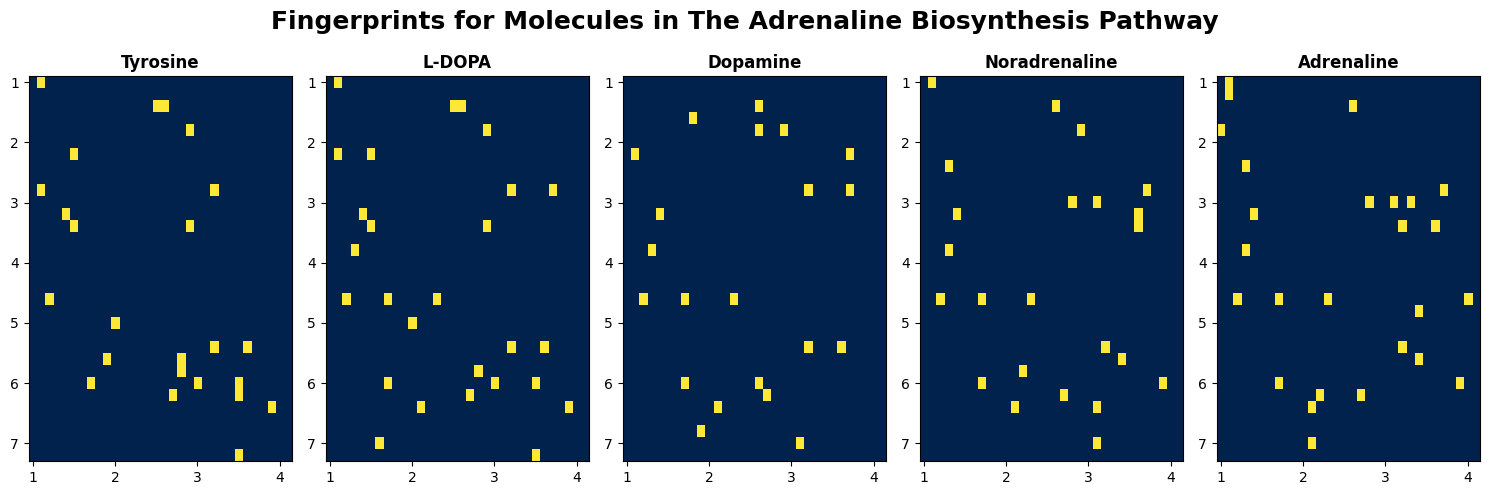

In [ ]:
fig, ax = plt.subplots(1, len(fps), figsize = (15,5))

for i, fp in enumerate(fps):
  fp = np.array(fp)
  fp_reshaped = fp.reshape(32,32)
  ax[i].imshow(fp_reshaped, cmap = "cividis", aspect = "auto")
  ax[i].set_xticklabels(range(32))
  ax[i].set_yticklabels(range(32))
  ax[i].set_title(labels[i], fontweight = "bold")

plt.suptitle("Fingerprints for Molecules in The Adrenaline Biosynthesis Pathway", fontweight = "bold", fontsize = 18)
fig.tight_layout()

Above we can see the fingerprint for each molecule in the adrenaline biosynthesuis pathway. Each yellow cell corresponds to a bit that is on (1). Each dark blue cell corresponds to a bit that is off (0). By a quick glance we can see that some of the bits are shared between these molecules (meaning that they share a certain molecular fragment), which is not a surprise since the molecules are quite similar.

But what if we are interested in seeing what fragment a certain bit corresponds to? RDKit luckily has functions to determine this as well.

Below i'll show we can draw the structure of the on-bits in each fingerprint. For this we will not use the previous fingerprintgenerator, but the GetMorganFingerprintASBitVect method from AllChem. This takes the argument bitInfo, to which you pass an empty dictionary, where the info on the fragments corresponding to each bit are saved.

We then employ the DrawMorganBits method from Chem.Draw, to draw each of the bits. This method takes tuples of (mol, fingerprint, bitinfo) and returns a drawing of the fragments of the bits that are on, as well a the indices of the bits in the fingerprint.

Below i will draw the fragments only for the first molecule (Tyrosine). Notice that the central atom is highlighted for each fragment is highlighted in blue, and all fragments only extend to two bonds (max) from that central atom, since we have set radius to 2 when getting the fingerprint. Notice also that some fragments don't extend to two bonds from the central atom, because when setting the radius to two, we get all fragments ***up to*** a bond radius of 2.

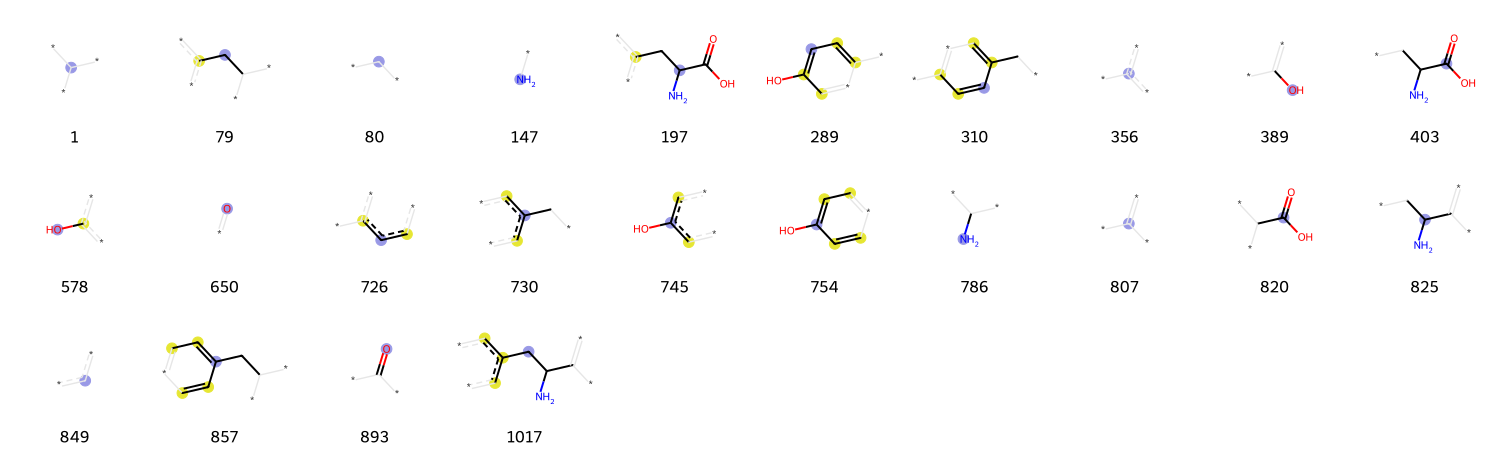

In [ ]:
bitinfos = [{} for i in range(len(mols))]
onbits = []

for i in range(len(mols)):
  mol = mols[i]
  fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bitinfos[i])
  onbits.append(fp.GetOnBits())

tpls = [(mols[0], x, bitinfos[0]) for x in onbits[0]]

Draw.DrawMorganBits(tpls, molsPerRow=10, legends=[str(x) for x in onbits[0]])

<a name="7"></a>
## **Similarity Searches - Computing the Tanimoto Similarity**

The Tanimoto similarity is based on the similarity between two fingerprints. The Tanimoto similarity is a measure of how many of the bits that are shared between the two molecules, as compared to the total amount of bits present in the two. In other words, it is the ratio of the intersection of A and B to the union of A and B, with A and B being the fingerprint of the two molecules.

$$T(A,B) = \frac{\vert A \cap B\vert}{\vert A \cup B \vert}= \frac{\vert A \cap B\vert}{\vert A \vert + \vert B \vert - \vert A \cap B \vert}$$

Below i will do a loop that calculates the pairwise tanimoto similarities for our molecules.

In [ ]:
N = len(mols)
similarity_matrix = np.zeros((N,N))
for i in range(N):
  for j in range(N):
    sim = DataStructs.TanimotoSimilarity(fps[i], fps[j])
    similarity_matrix[i][j] = sim

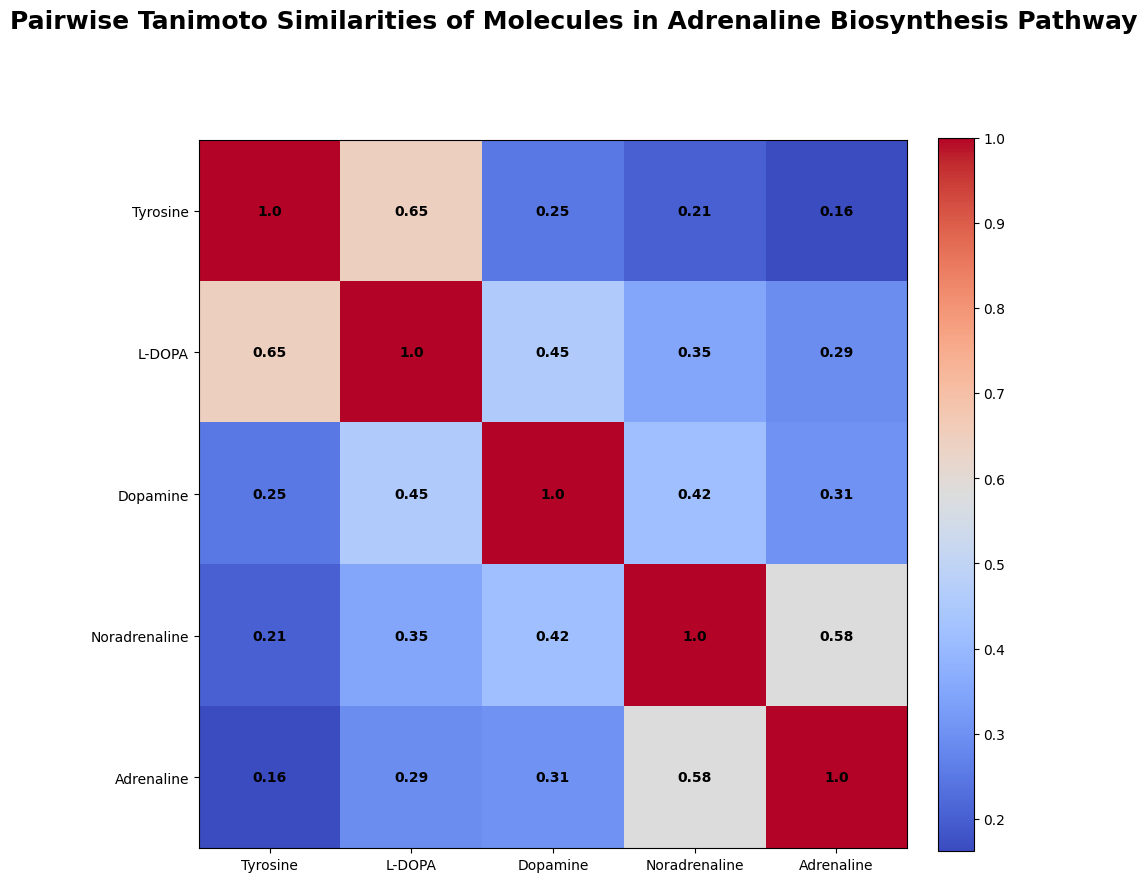

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

im = ax.imshow(similarity_matrix, cmap = "coolwarm")
ax.set_xticks(range(5))
ax.set_xticklabels(labels)
ax.set_yticks(range(5))
ax.set_yticklabels(labels)

fig.suptitle("Pairwise Tanimoto Similarities of Molecules in Adrenaline Biosynthesis Pathway", fontweight = "bold", fontsize = 18)

# add labels to each cell of the similarity

for i in range(N):
  for j in range(N):
    ax.text(i,j, similarity_matrix[i][j].round(2), ha = "center", va = "center", color = "black", fontweight = "bold")

fig.colorbar(im,fraction=0.046, pad=0.04)


#### **Count Fingerprints**
The default fingerprints are as discussed vectors that contain information about whether a certain fragment is present in the molecule. Note however, that it doesn't contain information about how many times a certain fragment appears. This can become a problem. Let's for example consider three saturated fatty acids: octanoic acid, dodecanoic acid and hexacosanoic acid.


In [ ]:
octanoic_acid = Chem.MolFromSmiles("CCCCCCCC(=O)O")
dodecanoic_acid = Chem.MolFromSmiles("O=C(O)CCCCCCCCCCC")
hexacosanoic_acid = Chem.MolFromSmiles("O=C(O)CCCCCCCCCCCCCCCCCCCCCCCCC")

fatty_acids = [octanoic_acid, dodecanoic_acid, hexacosanoic_acid]
labels = ["Octanoic Acid", "Dodecanoic Acid", "Hexacosanoic Acid"]

The three fatty acids are all fully saturated and the only difference between them is the length of the alkyl chain. Let's try to compute their fingerrints and plot the indexes of each on-bit in each fingerprint.

In [ ]:
fpgen = AllChem.GetMorganGenerator(radius=2, fpSize = 1024) # Instantiate a fingerprint generator
fa_fps = [fpgen.GetFingerprint(i) for i in fatty_acids]     # Compute fingerpritns for the fatty acids
on_bits = [np.array(i.GetOnBits()) for i in fa_fps]         # Get the on-bits

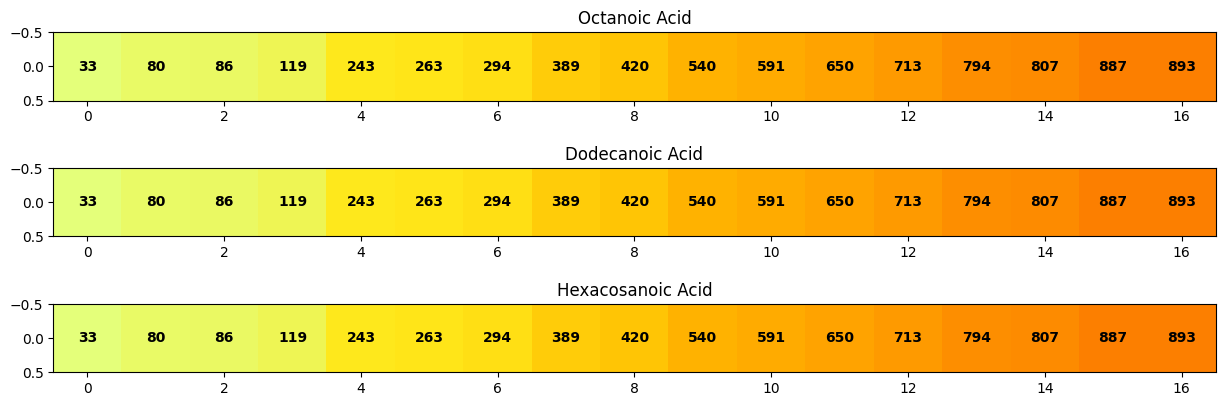

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (15, 5))

for i, bits in enumerate(on_bits):
  ax[i].imshow(bits.reshape(1,-1), cmap = "Wistia")
  ax[i].set_title(labels[i])
  for j, bit_idx in enumerate(bits):
    ax[i].text(j, 0, bit_idx, ha = "center", va = "center", fontweight = "bold")

You can quickly see from the plot that the fingerprints are completely identical, even though the molecules are vastly different and have different chemical properties. This is a huge problem, if for example using the fingerprints to featurize molecules for a machine learning model, because the feature array will be identical for molecules that do not necessarily have the same chemical properties.

We can see the same thing if we compute the pairwise tanimoto similarity  for the fatty acids. The similarity is 1, but the molecules are **not** identical!

In [ ]:
N = len(fatty_acids)
similarity_matrix = np.zeros((N,N))
for i in range(N):
  for j in range(N):
    sim = DataStructs.TanimotoSimilarity(fa_fps[i], fa_fps[j])
    similarity_matrix[i][j] = sim

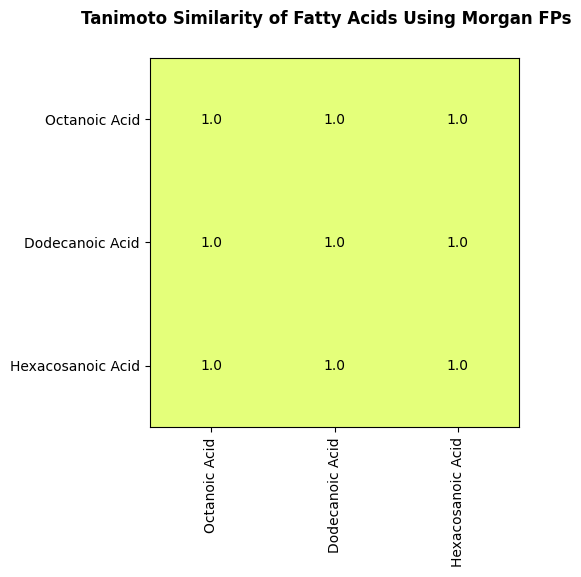

In [ ]:
fig, ax = plt.subplots(1)
fig.suptitle("Tanimoto Similarity of Fatty Acids Using Morgan FPs", fontweight = "bold")
ax.imshow(similarity_matrix, cmap = "Wistia")
ax.set_xticks(range(N))
ax.set_yticks(range(N))
ax.set_xticklabels(labels, rotation = 90)
ax.set_yticklabels(labels)

for i in range(N):
  for j in range(N):
    ax.text(i, j, similarity_matrix[i][j], ha = "center", va = "center")

A solution to this is the count fingerprint, that takes into consideration how many times a certain fragment appears. Basically every fragment gets allocated *more* than one bit in the fingerprint, and there is a threshold for how many times the fragment should appear, for each of these bits to be 'flipped' and set to 1. Let's try to compute the count-fingerprints for the fatty acids, compute their Tanimoto similarities and compare with what we saw for the standard fingerprints.

In [ ]:
fa_count_fps = [fpgen.GetCountFingerprint(i) for i in fatty_acids]

In [ ]:
N = len(fatty_acids)
similarity_matrix_count = np.zeros((N,N))
for i in range(N):
  for j in range(N):
    sim = DataStructs.TanimotoSimilarity(fa_count_fps[i], fa_count_fps[j])
    similarity_matrix_count[i][j] = sim

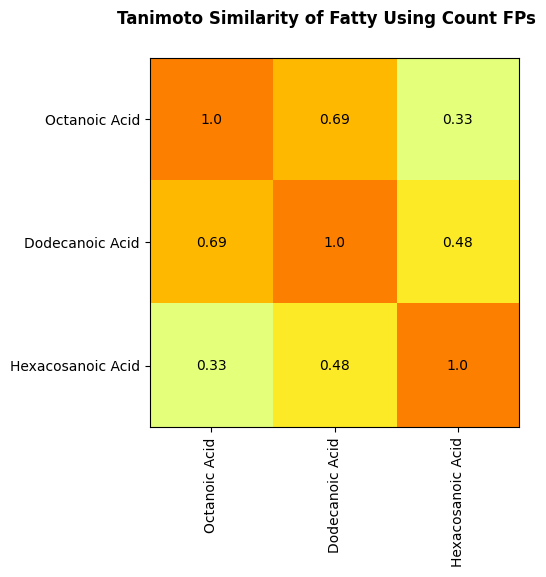

In [ ]:
fig, ax = plt.subplots(1)
fig.suptitle("Tanimoto Similarity of Fatty Using Count FPs", fontweight = "bold")
ax.imshow(similarity_matrix_count, cmap = "Wistia")
ax.set_xticks(range(N))
ax.set_yticks(range(N))
ax.set_xticklabels(labels, rotation = 90)
ax.set_yticklabels(labels)

for i in range(N):
  for j in range(N):
    ax.text(i, j, similarity_matrix_count[i][j].round(2), ha = "center", va = "center")

We see now that the fingerprints take the length of the alkyl chain into account, and that the similarities make much better sense now. Octanoic acid is more similar to dodecanoic acid that has a slightly longer alkyl chain, than it is to hexacosanoic acid that has a significantly longer alkyl chain.